<a href="https://colab.research.google.com/github/chris20834/AI-Summer-Camp/blob/main/CNN_ImgaeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 載入 TensorFlow 這個超強的 AI 魔法工具箱
import tensorflow as tf

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
print("訓練圖片的數量和大小:", train_images.shape)
print("訓練圖片的標籤數量:", train_labels.shape)

訓練圖片的數量和大小: (60000, 28, 28)
訓練圖片的標籤數量: (60000,)


In [ ]:
# 看看第一張圖片的內容 (前幾行像素值)
print("\n第一張訓練圖片的前 5 行像素值:")
print(train_images[1][:5]) # 顯示第一張圖的前 5 行像素值 (0-255)


第一張訓練圖片的前 5 行像素值:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]]


In [ ]:
print("\n第一張訓練圖片的標籤:", train_labels[0])


第一張訓練圖片的標籤: 5


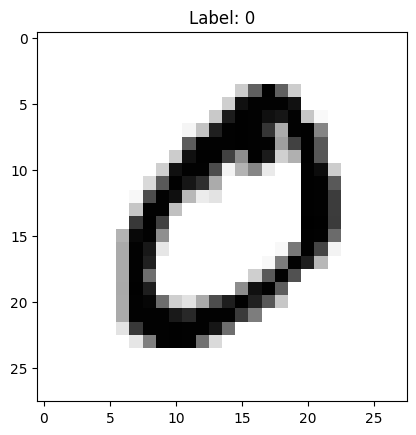

In [ ]:
import matplotlib.pyplot as plt

# 顯示訓練資料集中的第一張圖片
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.title(f"Label: {train_labels[1]}")
plt.show()

In [ ]:
# 將圖片的像素值從 0-255 縮放到 0-1 之間
# 這就像把圖片的亮度統一調整到一個小範圍
train_images = train_images / 255.0
test_images = test_images / 255.0

# 再看看第一張圖片的內容 (經過標準化後)
print("標準化後第一張訓練圖片的前 5 行像素值:")
print(train_images[1][:5]) # 現在值會介於 0.0 到 1.0 之間

標準化後第一張訓練圖片的前 5 行像素值:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         

In [ ]:
print("訓練圖片的資料類型:", train_images.dtype)
print("測試圖片的資料類型:", test_images.dtype)

訓練圖片的資料類型: float64
測試圖片的資料類型: float64


In [ ]:
model = tf.keras.models.Sequential([
    # 第一塊積木：卷積層 (Conv2D)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 第二塊積木：池化層 (MaxPooling2D)
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 第三塊積木：攤平層 (Flatten)
    tf.keras.layers.Flatten(),
    # 第四塊積木：全連接層 (Dense) - 中間層
    tf.keras.layers.Dense(128, activation='relu'), # 128 個「神經元」
    # 第五塊積木：全連接層 (Dense) - 輸出層
    tf.keras.layers.Dense(10, activation='softmax') # 10 個「神經元」對應 0-9 數字
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 編譯你的 AI 大腦模型
model.compile(optimizer='adam', # 設定學習方法：Adam 優化器
      loss='sparse_categorical_crossentropy', # 設定計算錯誤的方式：損失函數
      metrics=['accuracy']) # 設定評估標準：準確率

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9109 - loss: 0.2977
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0509
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9907 - loss: 0.0302
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9936 - loss: 0.0206
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0124


In [ ]:
# 考考 AI 學得怎麼樣？使用測試資料集來評估
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\n測試資料集上的損失值 (Test Loss):", test_loss)
print("測試資料集上的準確率 (Test Accuracy):", test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9854 - loss: 0.0488

測試資料集上的損失值 (Test Loss): 0.04879192262887955
測試資料集上的準確率 (Test Accuracy): 0.9854000210762024


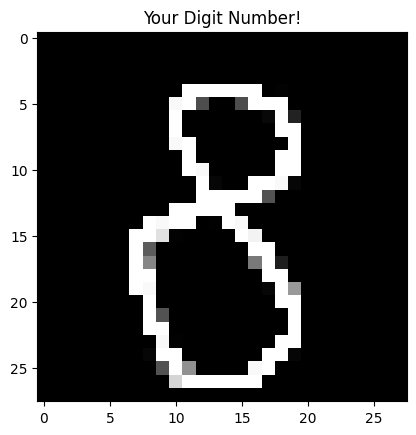

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# --- 設定你的圖片路徑 ---
my_image_path = "/content/8.png"

# 圖片預處理：載入、縮放、轉為灰階、標準化
# 1. 載入圖片並調整大小 (MNIST 圖片是 28x28 像素)
img = image.load_img(my_image_path, target_size=(28, 28), color_mode="grayscale") # 設定為灰階模式)

# 2. 將圖片轉換為 NumPy 陣列
img_array = image.img_to_array(img)

# 3. 增加一個維度 (批次維度)
# 模型預期輸入是 (批次數量, 高度, 寬度, 顏色通道)，即使只有一張圖也要加上批次維度
img_array = np.expand_dims(img_array, axis=0)

# 4. 標準化像素值 (從 0-255 縮放到 0-1)
img_array /= 255.0

# 顯示這張你準備用來預測的圖片
plt.imshow(img, cmap=plt.cm.binary)
plt.title("Your Digit Number!")
#plt.axis('off')
plt.show()

In [ ]:
# 讓 AI 模型進行預測
# model.predict() 會輸出每個類別 (0-9) 的機率
predictions = model.predict(img_array)

# 找出機率最高的數字 (也就是 AI 認為最可能是哪個數字)
predicted_digit = np.argmax(predictions[0]) # np.argmax 會找出陣列中最大值的索引

# 取得 AI 對這個預測的信心度 (機率值)
confidence = predictions[0][predicted_digit] * 100 # 將機率轉換為百分比

# 顯示 AI 的預測結果
print(f"\nAI 預測這個數字是： {predicted_digit}")
print(f"AI 對這個預測的信心度為： {confidence:.2f}%")

# 顯示所有數字的機率分佈 (可選)
print("\n--- 各數字的預測機率 ---")
for i in range(10):
    print(f"數字 {i}: {predictions[0][i]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

AI 預測這個數字是： 8
AI 對這個預測的信心度為： 100.00%

--- 各數字的預測機率 ---
數字 0: 0.00%
數字 1: 0.00%
數字 2: 0.00%
數字 3: 0.00%
數字 4: 0.00%
數字 5: 0.00%
數字 6: 0.00%
數字 7: 0.00%
數字 8: 100.00%
數字 9: 0.00%
